# Ejercicio 1

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings

import funciones_auxiliares_machine_learning as aux

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

# Ejercicio 2

In [20]:
import pickle

modelo_propio = pickle.load(open('javier-rojas-actividad07.sav', 'rb'))
X_train = pickle.load(open('javier-rojas-X-train-actividad07.sav', 'rb'))
y_train = pickle.load(open('javier-rojas-y-train-actividad07.sav', 'rb'))
X_test = pickle.load(open('javier-rojas-X-test-actividad07.sav', 'rb'))
y_test = pickle.load(open('javier-rojas-y-test-actividad07.sav', 'rb'))

In [21]:
aux.reportar_metricas_regresion(modelo_propio, X_test, y_test)

|     |      valores |
|:----|-------------:|
| MAE | 24502        |
| R2  |     0.778335 |


## Reportar metricas de modelo de companero

In [22]:
modelo_companero = pickle.load(open('diego_lizana_actividad07.sav', 'rb'))
X_train_c, X_test_c, y_train_c, y_test_c = pickle.load(open('matrices_train_test.sav', 'rb'))

In [25]:
aux.reportar_metricas_regresion(modelo_companero, X_test_c, y_test_c)

|     |     valores |
|:----|------------:|
| MAE | 23524.9     |
| R2  |     0.80861 |


- Segun los resultados, el modelo del compañero Diego Lizana tiene un mejor desempeño. Esto,
ya que presenta un MAE mas bajo, y un R2 mas alto que el modelo propio.

In [26]:
aux.reportar_metricas_regresion(modelo_companero, X_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Exter_Qual_Typical
- Foundation_PConc
- Longitude
Feature names seen at fit time, yet now missing:
- Exual_Typical
- Fireplaces
- Year_Remod_Add


- El modelo de Diego Lizana genera un error al intentar validarlo con los datos de validacion propios.
Esto ocurre debido a que el modelo utiliza variables independientes que estan ausentes en el conjunto de datos de validacion propia.

- Esta diferencia en al utilizacion de variables pudo ocurrir debido a las siguientes razones:
    - Distinto random_state al momento de declarar el modelo
    - Distinta separacion de datos con train_test_split (lo que pudo generar un sesgo de importancia
    hacia las distintas variables utilizadas en cada modelo)

# Ejercicio 3

In [57]:
random_forest = RandomForestRegressor(random_state=1)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [58]:
aux.reportar_metricas_regresion(random_forest, X_test, y_test)

|     |      valores |
|:----|-------------:|
| MAE | 19723.4      |
| R2  |     0.859388 |


- La tabla comparativa de resultados son las siguientes:


Modelo|MAE|R2
------|---|--
Grilla|24420|0.76|
RandomForest|19723|0.85|

- Por lo tanto, se puede observar que el modelo basado en un RandomForest tuvo un drastico aumento en el desempeno (disminucion del error, y aumento del poder explicativo r2).

# Ejercicio 4

In [59]:
grilla = {
    'max_features': [None, 'log2', 'sqrt'],
    'n_estimators': range(20, 1001, 50)
}

random_forest_grilla = GridSearchCV(RandomForestRegressor(oob_score=True, bootstrap=True), param_grid=grilla,
                                    verbose=5, n_jobs=-1)
random_forest_grilla.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
             param_grid={'max_features': [None, 'log2', 'sqrt'],
                         'n_estimators': range(20, 1001, 50)},
             verbose=5)

In [60]:
print(f'Los mejores parametros son: {random_forest_grilla.best_params_}')
print(f'El mejor desempeno es: {random_forest_grilla.best_score_}')
print(f'El mejor desempeno OOB es: {random_forest_grilla.best_estimator_.oob_score_}')

Los mejores parametros son: {'max_features': 'log2', 'n_estimators': 870}
El mejor desempeno es: 0.8515398914929652
El mejor desempeno OOB es: 0.8552116248939674


In [61]:
oob_score = random_forest_grilla.best_estimator_.oob_score_

In [62]:
resultados_cv = pd.DataFrame(random_forest_grilla.cv_results_)
resultados_cv['params_str'] = resultados_cv['params'].astype(str) 

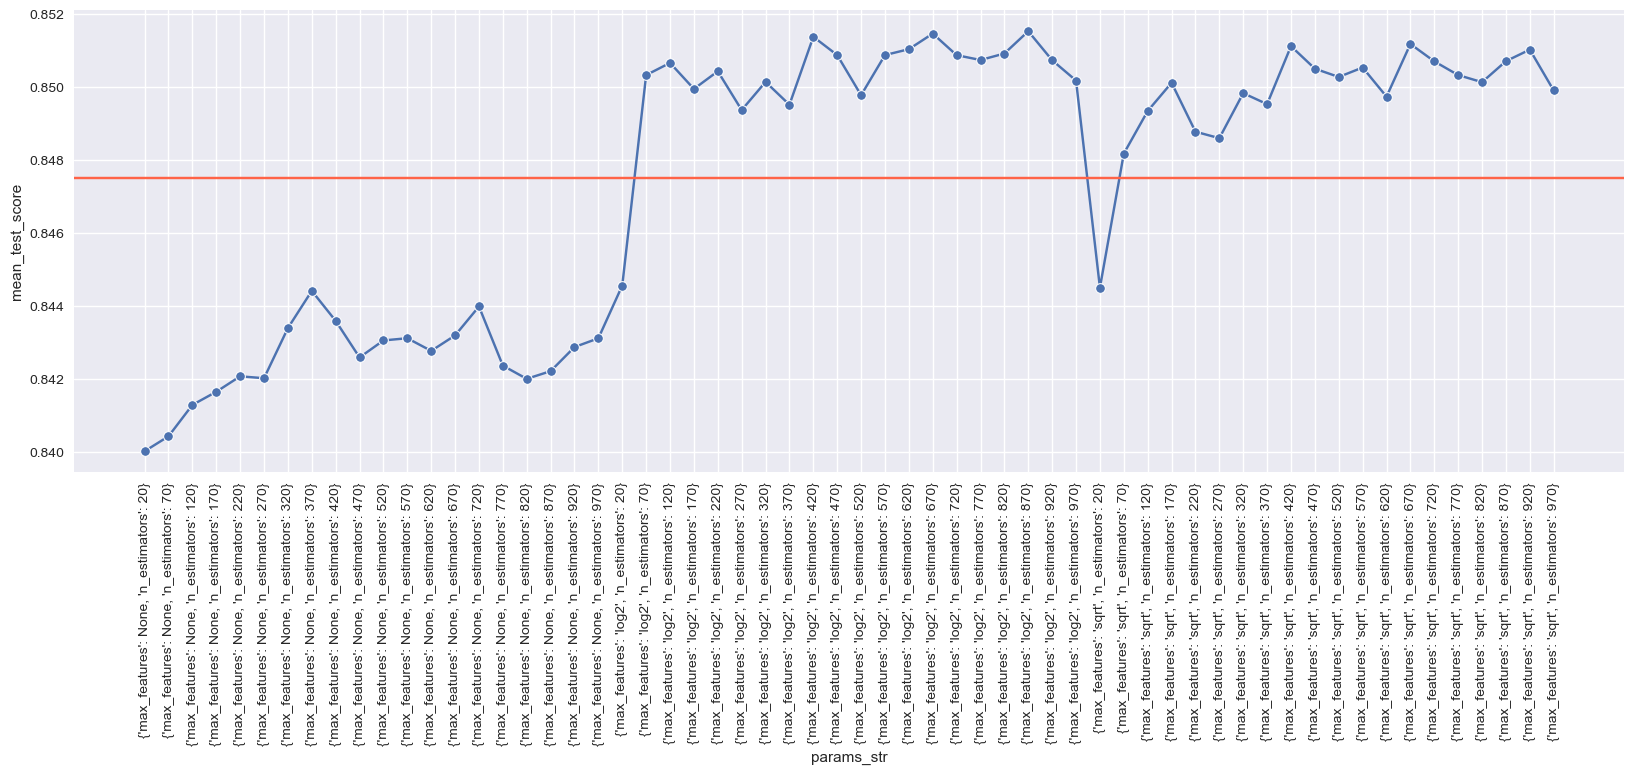

In [63]:
fig, axis = plt.subplots(figsize=(20, 6))
sns.lineplot(data=resultados_cv, x='params_str', y='mean_test_score', ax=axis, marker='o')
axis.axhline(resultados_cv['mean_test_score'].mean(), c='tomato')
axis.tick_params(axis='x', labelrotation=90)

- Desde el grafico se puede observar que el rendimiento del modelo es menor a la media cuando se utiliza max_features = None.
- El modelo presenta un desempeno similar al utilizar max_features = log2 o sqrt.
- Se puede identificar que el modelo con el mejor desempeno es con los parametros max_features = log2 y n_estimators = 870.
- El peor modelo utiliza max_features = log2 y n_estimators = 20.

# Ejercicio 5

In [65]:
random_optimo = RandomForestRegressor(n_estimators=870, max_features='log2', oob_score=True, bootstrap=True,
                                      random_state=1).fit(X_train, y_train)
aux.calcular_metricas_regresion(random_optimo, X_test, y_test)

,valores
MAE,19374.705012
R2,0.858639


- La tabla resumen de todos los modelos son los siguientes:

Modelo|MAE|R2
------|---|--
Grilla|24420|0.76|
RandomForest|19723|0.859|
RandomForest Optimo|19374|0.858|

- Teniendo en cuenta estos resultados, el modelo optimo presenta el mae mas bajo y un r2 comparable al random forest sin optimizacion de hiperparametros. Por lo tanto, el modelo
optimizado presenta el mejor desempeno.